## Problem 1

*   We have 2 opaque bags, each containing 2 bal ls. One bag 
    has 2 black bal ls and the other has a black and a white bal l . You pick a bag 
    at random and then pick one of the balls in that bag at random. When you 
    look at the ball it is black. You now pick the second ball from that same bag. 
    What is the probability that this ball is also black? {Hint: Use Bayes' Theorem}
    ### $ P(A|B) = \frac{P(B|A) * P(A)}{P(B)} $

In [425]:
def bayes_theorem(p_a, p_b_given_a, p_b):
    return (p_b_given_a * p_a) / p_b

In [426]:
def probability_black_ball():
    # Probability of picking bag 1 (2 black balls)
    p_bag1 = 0.5
    # Probability of picking bag 2 (1 black and 1 white ball)
    p_bag2 = 0.5

    # Probability of picking a black ball given bag 1 (2 black balls)
    p_black_given_bag1 = 1.0
    # Probability of picking a black ball given bag 2 (1 black and 1 white ball)
    p_black_given_bag2 = 0.5

    # Total probability of picking a black ball
    p_black = (p_black_given_bag1 * p_bag1) + (p_black_given_bag2 * p_bag2)

    # Probability of picking bag 1 given that we picked a black ball
    # p_bag1_given_black = bayes_theorem(p_bag1, p_black_given_bag1, p_black)

    # Probability of the second ball being black given that the first ball was black
    p_second_ball_black_given_first_black = bayes_theorem(p_bag1, p_black_given_bag1, p_black)

    return p_second_ball_black_given_first_black

In [427]:
f'Probability that the second ball is also black: = {probability_black_ball():.4f}'

'Probability that the second ball is also black: = 0.6667'

# Problem 2 
In this problem you’ll generate a synthetic/artificial data set to study the perceptron 
learning algorithm. The data is two-dimensional, where the range of x1 and x2 is between 
−1 and +1.  
   * Define a target function as a straight line passing through the origin and having a 
        random slope. One way to generate a random slope is to randomly choose a number 
        between 0 and π and compute its tangent.
          
   * Generate 30 points in the plane limited to the ranges given above (between −1 and 1). 
        The points have two coordinates so you need to independently generate 30 random 
        numbers for each of the two coordinates, x1 and x2. For example, generate an array of 
        30 random numbers for x1 and then another for x2 and then bring the two together as two 
        columns of a matrix. That would have a usual table form of the data – each row one 
        point, and each column one feature.  
        
   * Label the points so that your target function separates them perfectly. Use +1 and −1 
        for the labels. Make the labels the third column in your data set. Now you have a 
        complete data set ready for supervised learning.  
        
   * Provide a plot of the target function and the properly labelled points as classified by 
        the target function. For example, you may use ‘+’ and ‘o’ to label ‘positive’ and ‘negative’ 
        points as decided by the target function. You also may want to use colors for better 
        clarity, for example, negative points would be red and positive points blue.  
        
   * Implement the PLA algorithm and run it on your data set. Report the number of 
        iterations it took to produce the final hypothesis. Plot the result – the target function, final 
        hypothesis and data points. Embellish/mark your plot so it’s clear what it shows.

In [428]:
import numpy as np
import random
import math
import pandas as pd

def generate_dataset(num_points=30, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    # Generate random slope
    slope = math.tan(random.uniform(0, math.pi))
    
    # Generate random points
    x1 = np.random.uniform(-1, 1, num_points)
    x2 = np.random.uniform(-1, 1, num_points)
    
    # Create labels based on the target function
    # Points above the line (x2 > slope*x1) are +1, below are -1
    labels = np.where(x2 > slope * x1, 1, -1)
    
    # Combine into a DataFrame
    data = pd.DataFrame({'x1': x1, 'x2': x2, 'label': labels})
    
    return data, slope

In [429]:
data, slope = generate_dataset(seed=42)

In [430]:
data

,x1,x2,label
0,-0.250920,0.215090,1
1,0.901429,-0.658952,-1
2,0.463988,-0.869897,-1
3,0.197317,0.897771,1
4,-0.687963,0.931264,1
5,-0.688011,0.616795,1
6,-0.883833,-0.390772,1
7,0.732352,-0.804656,-1
8,0.202230,0.368466,-1
9,0.416145,-0.119695,-1


In [431]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,30.0,-0.122805,0.564815,-0.958831,-0.625056,-0.193515,0.218337,0.939820
x2,30.0,-0.007191,0.658209,-0.931223,-0.624727,0.015245,0.600162,0.939169
label,30.0,0.266667,0.980265,-1.000000,-1.000000,1.000000,1.000000,1.000000


In [432]:
import matplotlib.pyplot as plt

def plot_data(data, slope, weights=None):
    plt.figure(figsize=(12, 8))
    
    # divide the data into positive and negative points
    positive_points = data[data['label'] == 1]
    negative_points = data[data['label'] == -1]
    
    # plot points
    plt.scatter(positive_points['x1'], positive_points['x2'], color='blue', marker='+', label='Positive')
    plt.scatter(negative_points['x1'], negative_points['x2'], color='red', marker='o', label='Negative')
    
    # plot the target function line
    x = np.linspace(-1, 1, 100)
    y = slope * x
    plt.plot(x, y, color='green', label=f'Target Function with slope {slope:.4f}')
    
    # plot the line y = slope * x
    # -> Hypothesis line: w0 + (w1 * x1) + (w2 * x2) + ... + (wn * xn) = 0
    if weights[2] != 0:  # Avoid division by zero
        y_hypothesis = -(weights[0] + weights[1] * x) / weights[2]
        plt.plot(
            x, y_hypothesis, 'b--', linewidth=2,
            label=f'Hypothesis (w=[{weights[0]:.4f}, {weights[1]:.4f}, {weights[2]:.4f}])'
        )

    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.grid(True)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("Plot of Target Function and Data Points")
    plt.legend()
    
    plt.show()

In [433]:
def perceptron_learning_algorithm(data, max_iterations=1000, learning_rate=1):
    
    # Initialize weights and bias
    weights = np.zeros(3)
    
    # Label and feature extraction
    X = data[['x1', 'x2']].values
    y = data['label'].values
    
    # Add bias term to the features... practically, this is a column of ones
    X_with_bias = np.column_stack((np.ones(len(X)), X))
    
    # PLA loop
    
    iterations = 0
    misclassified = True
    
    while misclassified and iterations < max_iterations:
        misclassified = False
        iterations += 1
        
        for i in range(len(X_with_bias)):
            
            # predction calculation
            prediction = np.sign(np.dot(weights, X_with_bias[i]))
            
            # Update weights if the prediction is incorrect
            if prediction != y[i]:
                weights += learning_rate * y[i] * X_with_bias[i]
                misclassified = True
        
        if not misclassified:
            break
            
    return weights, iterations

Perceptron Learning Algorithm completed in 5 iterations.
Final weights: 0.0000, -3.9794, 0.9545


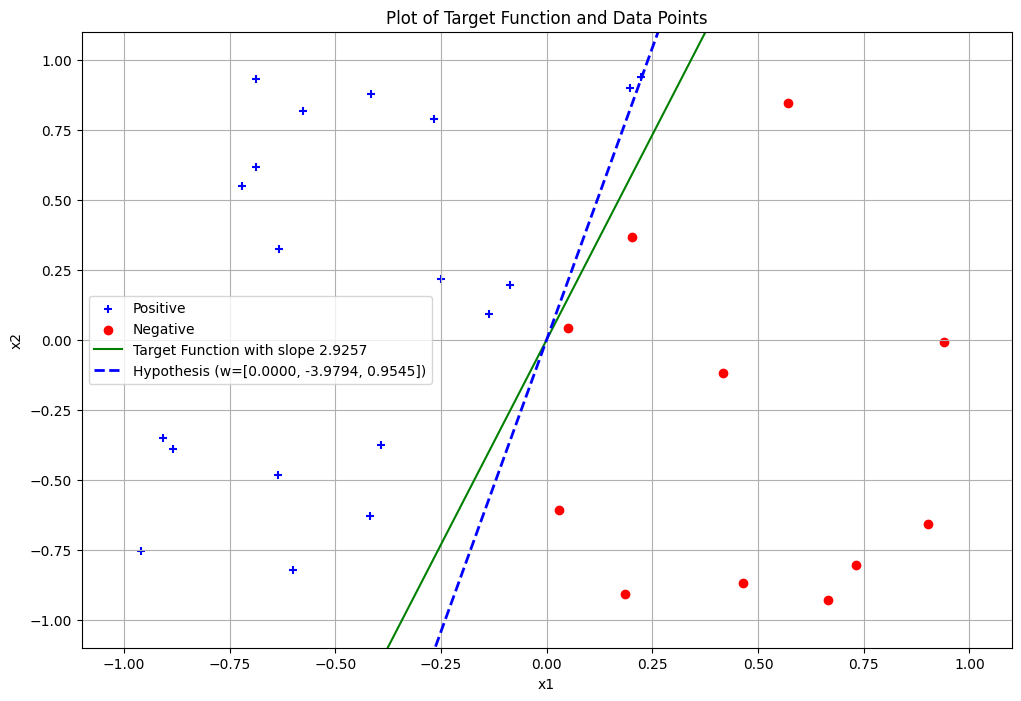

In [434]:
weights, iterations = perceptron_learning_algorithm(data, max_iterations=1000)

print(f'Perceptron Learning Algorithm completed in {iterations} iterations.')
print(f'Final weights: {weights[0]:.4f}, {weights[1]:.4f}, {weights[2]:.4f}')

plot_data(data, slope, weights)

# Problem 3

In [435]:
n_points = 2000
max_value = 10000
inner_radius = 10
thickness = 5
separation = 5
dimensionality = 2

In [436]:
import data_util as utils

# Generate the dataset and create random points in a ringly shape
radii, radians = utils.generate_random_ring(n_points, inner_radius, inner_radius + thickness, max_value)

# Move the bottom ring and assign the labels (+1 for the top ring, -1 for the bottom ring)
xs, ys, signs = utils.move_bottom_ring_and_assign(radii, radians, inner_radius + thickness / 2.0, -separation)

# Create a DataFrame
dataframe = pd.DataFrame({
    'x1': xs.flatten(), 
    'x2': ys.flatten(), 
    'y': signs.flatten()
})

dataframe['x0'] = 1 # Bias term
dataframe = dataframe[['x0', 'x1', 'x2', 'y']]

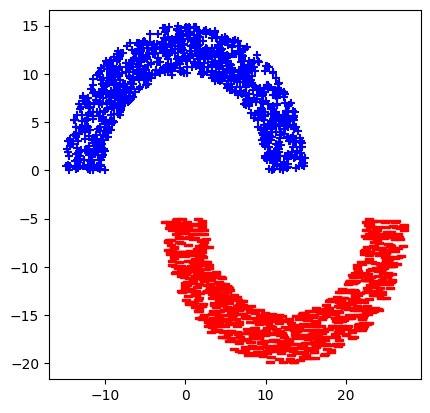

In [437]:
# Dataset Visualization setup

positives = dataframe.loc[dataframe['y'] == 1]
negatives = dataframe.loc[dataframe['y'] == -1]

figsize = plt.figaspect(1)
fig, ax = plt.subplots(1, 1, figsize=figsize)

positives_scatter = ax.scatter(
    positives[['x1']].values, positives[['x2']].values,
    color='blue', marker='+', label='Positive labels'
)

negatives_scatter = ax.scatter(
    negatives[['x1']].values, negatives[['x2']].values,
    color='red', marker=r'$-$', label='Negative labels'
)

In [438]:
print(f'positive points count: {len(positives)}')
print(f'negative points count: {len(negatives)}')

positive points count: 1014
negative points count: 986


In [439]:
# A. Run the PLA algorithm on the dataset
import linear_models as lm

norm_gradient, num_iterations, _ = lm.perceptron(
    dataframe.values, dimensionality, max_it=1000, use_adaline=False,
    eta=1, randomize=False, verbose=True
)

Final correctness:  2000 . Total iteration:  15
Final w: [13.          0.83546882 41.49928776]


In [440]:
# Plot the dataset and the decision boundary
x1_range = np.arange(-(inner_radius + thickness), (inner_radius + thickness) + inner_radius + thickness / 2)
norm_gradient /= norm_gradient[-1] # Normalize the weights for plotting

hypothesis = ax.plot(
    x1_range, -(norm_gradient[0] + norm_gradient[1] * x1_range),
    color='green', label='PLA Hypothesis'
)

In [441]:
w_lin = lm.linear_regression(dataframe[['x0', 'x1', 'x2']].values, dataframe['y'].values)
print(f'Linear Regression Weights: {w_lin}')

Linear Regression Weights: [ 0.24723441 -0.00819251  0.07874585]


In [442]:
# Plot the linear regression decision boundary
linear = ax.plot(
    x1_range, -(w_lin[0] + w_lin[1] * x1_range),
    color='orange', label='Linear Regression Hypothesis'
)

In [443]:
# Some plot formatting
ax.set_title(f'Semi-circle dataset classification with PLA and Linear Regression ({num_iterations} iterations)', fontsize=14)

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)

ax.axis('tight')

(-17.112318160415708,
 29.358681368729847,
 -21.667591154882643,
 16.658385662349684)

In [444]:
legend_x, legend_y = 2.0, 0.5

ax.legend(
    ['Positive labels', 'Negative labels', 'PLA Hypothesis', 'Linear Regression Hypothesis'],
    loc='center right', bbox_to_anchor=(legend_x, legend_y)
)

In [445]:
fig.savefig('semi_circles_classification.png', dpi=300, bbox_inches='tight')

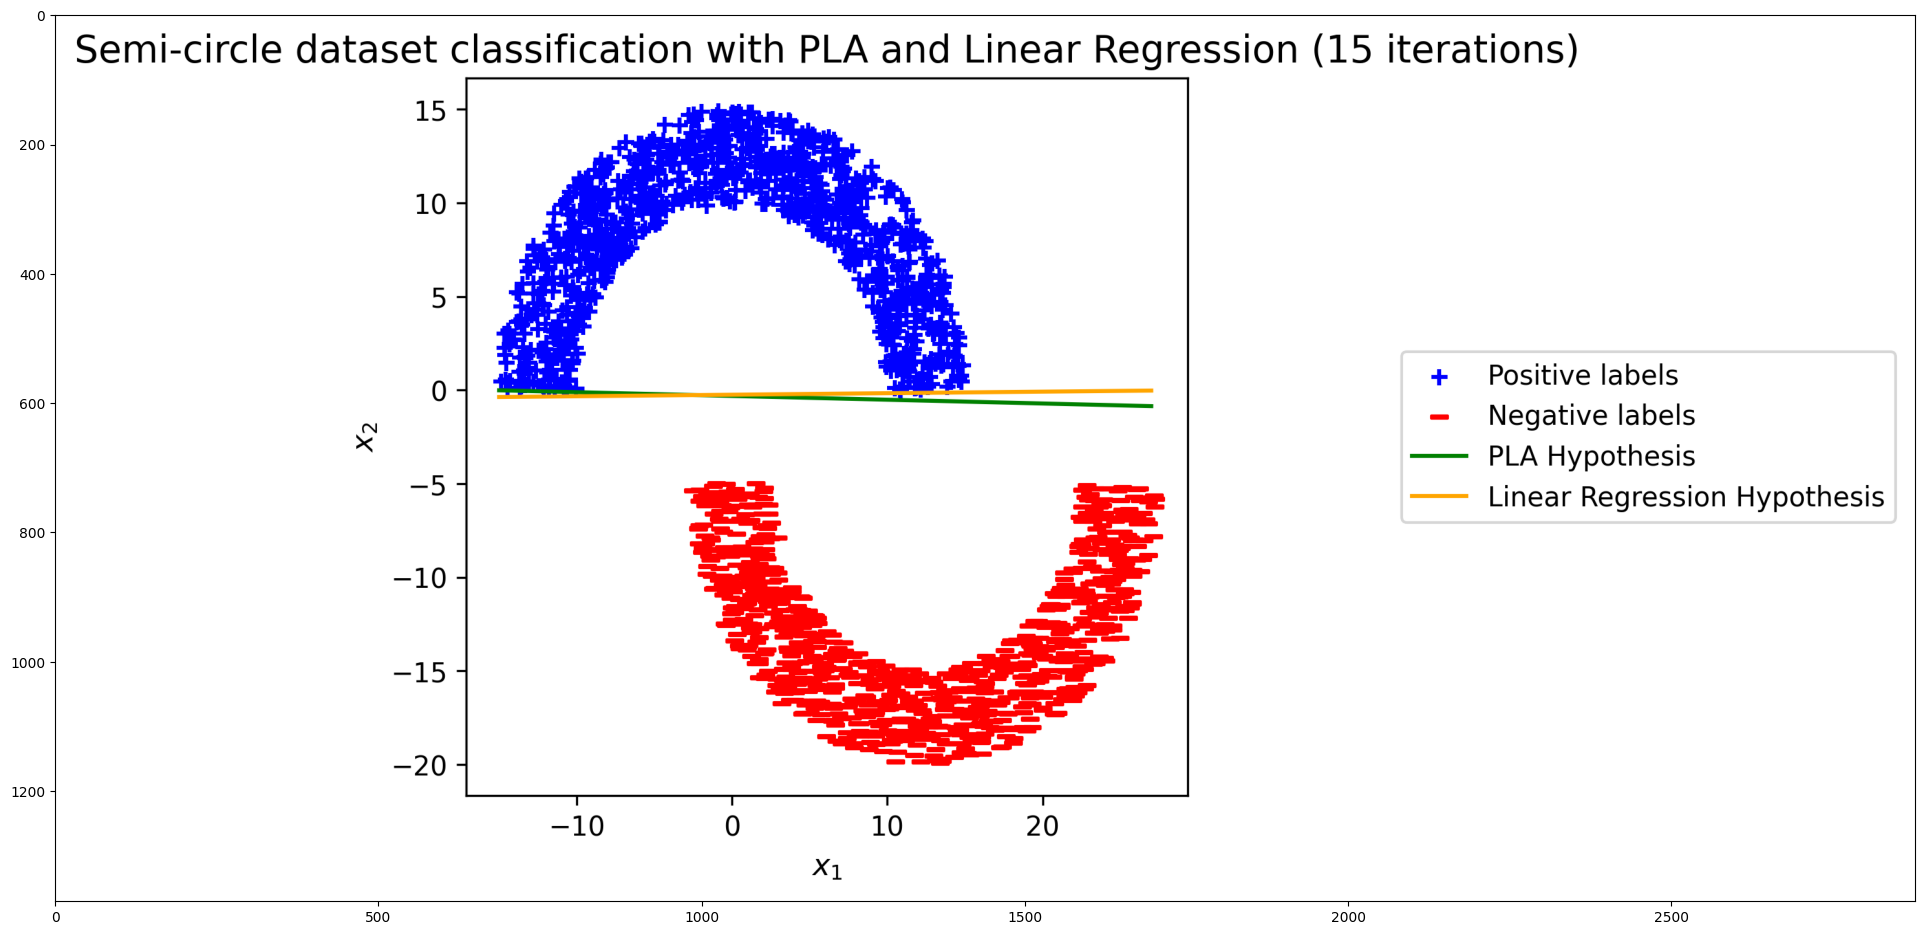

In [446]:
from PIL import Image

img_path = 'semi_circles_classification.png'

plt.figure(figsize=(24, 16))
plt.grid(False)

plt.imshow(Image.open(img_path))

# Assignment Closure

*The task coveyed by the third question in the assignment was to generate a semi-circle dataset suitable for the perceptron learning algorithm,
and the linear regression algorithm. The dataset was generated as two semicorcles with an inner radius and thickness of 10 and 5 units respectively, 
as well as a positive separation of 5 units between them. In these circles are a sum of 2000 data points.*

***NB: This task is doable as long as the separation between the two semicircles is greater than 0.***

## Observations from the Perceptron Learning Algorithm (PLA)
*   The algorithm iteratively updates or adjusts the decisioin boundary until it converges to a solution that separates the two classes of data points.
*   It has a decision boundary that is linear, and it can only separate linearly separable data -  final hypothesis creates a straight line that separates the two classes.
*   The number of iterations it took to converge to a solution is dependent on the dataset and the initial weights, 
 hence it requires multiple passes through the data until its convergence.
*   Finally it focuses on misclassified points, giving more attention to the boundary points that are difficult to classify.


## Observations from the Linear Regression Algorithm
*   The linear regression algorithm tries to find the best-fit line that minimizes the error between the predicted and actual labels - Using MSE rather than classification error.
*   It computes weights analytically in a single operation
*   All data points are treated equally, regardless of their position in the feature space.
*   All in all, The decision boundary is also linear, but it may not be optimal for classification tasks. The decision boundary appears slighlty tilted compared to the PLA hypothesis.

### Key Takeaway
*   PLA guarantees a good classification for linearly separable data if given enough iterations, while Linear regression is computationally 
efficient and can be used for regression tasks, and not for classification tasks.
*   THe Linear regression boundary reflects the average of all data points, while the PLA boundary focuses on the misclassified points.